In [1]:
import numpy as np 

In [2]:
X = 2 * np.random.rand(100, 1)


In [3]:
y = 4 + 3 * X + np.random.randn(100,1)

In [4]:
import matplotlib.pyplot as plt
plt.plot(X, y, "b.")
plt.axis([0,2, 0, 15])
plt.xlabel("X1")
plt.ylabel("y")
plt.show()

<Figure size 640x480 with 1 Axes>

In [5]:
X_b = np.c_[np.ones((100,1)), X] # add x0 = 1 for each instance

In [6]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [7]:
theta_best

array([[3.86548641],
       [3.21200303]])

In [8]:
X_new = np.array([[0], [2]])

In [9]:
X_new_b = np.c_[np.ones((2,1)), X_new] # add x0 = 1 for each instance

In [10]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.86548641],
       [10.28949246]])

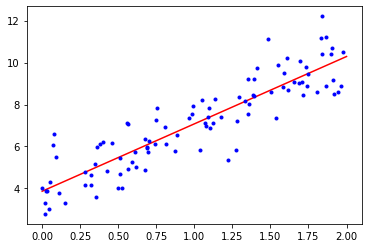

In [11]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")

We can get the same result using sscikit learn

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_ # same as theta_best

(array([3.86548641]), array([[3.21200303]]))

Scikit learn separates the bias term (intercept_) from feature weights (coef_)

## Gradient Descent

### Batch GD

In [14]:
eta = 0.1 # learning rate

In [15]:
n_iteration = 1000

In [16]:
m = 100 # number of training instances

In [17]:
theta = np.random.rand(2,1) # random initialization 

In [18]:
for iteration in range(n_iteration):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) -y )
    theta = theta - eta * gradients    

In [19]:
theta # eq to what the Normal Equation found above

array([[3.86548641],
       [3.21200303]])

### Stochastic GD

In [20]:
n_epochs = 50

In [21]:
t0,t1 = 5, 50 # learning schedule hyperparameters

In [22]:
def learning_schedule(t):
    return t0 / (t + t1)

In [23]:
theta = np.random.rand(2,1) # random initilization

In [24]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index: random_index + 1]
        yi = y[random_index: random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [25]:
theta

array([[3.9168101 ],
       [3.22618156]])

### Polynomial Regression

In [26]:
m = 100 # number of training instances

In [27]:
X = 6 * np.random.rand(m, 1) - 3

In [28]:
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1) # y = 0.5(x1)^2 + 1.0(x1) + 2.0 + Gaussian noise

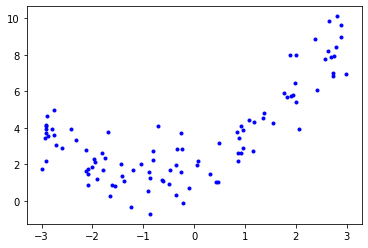

In [29]:
plt.plot(X, y , "b.")

In [30]:
from sklearn.preprocessing import PolynomialFeatures

In [31]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [32]:
X_poly = poly_features.fit_transform(X)

In [33]:
X[0]

array([-2.90781075])

In [34]:
X_poly[0]

array([-2.90781075,  8.45536337])

In [35]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.87946575]), array([[0.94819816, 0.5253506 ]]))

The model esitmates y = 0.512(x1^2) + 1.0624(x1) + 1.95

In [68]:
X_new = np.linspace(-3,3,100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

[-3, 3, 0, 10]

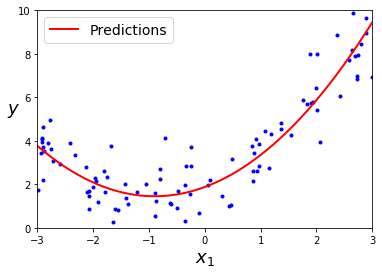

In [69]:
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])

## Ridge Regression

In [70]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[5.05110024]])

Same usign SGD:

In [71]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X,y)
sgd_reg.predict([[1.5]])

/Users/Sid/miniconda3/envs/pythonml/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([5.04019585])

### Lasso Regression

In [72]:
from sklearn.linear_model import Lasso

In [73]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.00658915])

Same implementation using BGD:

In [74]:
sgd_reg = SGDRegressor(penalty="l1")
sgd_reg.fit(X, y)
sgd_reg.predict([[1.5]])

/Users/Sid/miniconda3/envs/pythonml/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([5.03803535])

#### NOTE: What is l1 and l2 Regularization

> The key difference between these techniques is that Lasso (l1) shrinks the less important feature’s coefficient to zero thus, removing some feature altogether. So, this works well for feature selection in case we have a huge number of features.

https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c

### ElasticNet